In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import fixed
from tqdm import tqdm


# 1 OLS, polynomial toy model, and motivation for Ridge

### 1.1 Ordinary Least Square (OLS)
Recall that for Ordinary Least Squares, our goal is to minimize the squared error of our predicitons. For each data point $\vec{x}_i$, we try to minimize the square of the difference between our prediction, $\hat{y_i} = \vec{x}_i^T\vec{w}$, and the actual value, $y_i$. This can be formulated as the following:  \\

Optimization Problem: $\underset{\lambda}{\text{min }} \|y - Xw \|_2^2$

Closed Form Solution: $\hat{w} = (X^TX)^{-1}X^T\vec{y}$

Notice here that the matrix $X$ contains $n$ rows of training points stacked on top of each other: $X = 
\begin{bmatrix}
- \vec{x}_1^T -\\
- \vec{x}_2^T -\\
... \\
- \vec{x}_n^T -
\end{bmatrix}$


**1.1.1. Implement the closed form solution for OLS below:**

In [ ]:
def ols(X, y):
    ### BEGIN CODE ###
    w_hat = np.linalg.inv(X.T@X)@X.T@y
    ### END CODE ###
    return w_hat

## 1.2 Toy Model and Polynomial Regression
Let us assume we have a polynomial function, $y=f(x)$ where $x$ and $y$ are both scalars. We want to learn a model that can predict $y$ given an $x$ using polynomial regression.

We're given training x values of $x_1, x_2,...x_n$ and y values of $y_1, y_2,...y_n$. In the real world, collecting perfect data is impossible, and thus our y-values can be slightly off from the true function. We refer to this as **noise** in the data:

$y_i = f(x_i) + \delta_i$ where $\delta_i$ is the noise for the $i^{th}$ training point. It is out of scope for now to understand what values $\delta_i$ can take on. For now, all you need to know is that $\delta_i$ is unpredictable and somewhat small, but you will see shortly how it can affect the training of our model.

---

In order to perform polynomial regression, we need to lift the $x_i$ scalars into degree-$d$ polynomial features: $\vec{x_i} = [x_i^0, x_i^1, x_i^2, ..., x_i^d]^T$

The $X$ matrix as previously defined now consists of the $n$ feature vectors of training points stacked on top of each other: $X = 
\begin{bmatrix}
- \vec{x_1}^T -\\
- \vec{x_2}^T -\\
... \\
- \vec{x_n}^T -
\end{bmatrix}$

**1.2.1. Run the cell below to generate and visualize our training data, and answer the questions in the next cell.**


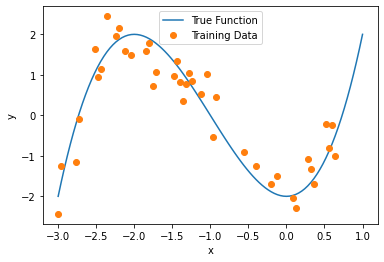

In [ ]:
def generate_data(x_range, func, sigma=1, n=80):
    y_range = np.array([func(x) + np.random.normal(0, sigma) for x in x_range])
    random_indicies = np.arange(len(x_range))
    np.random.shuffle(random_indicies)
    x = x_range[random_indicies[:n]]
    y = y_range[random_indicies[:n]]
    return x, y

def get_features(d, x_scalars):
    X = []
    for x in x_scalars:
        X.append([x**i for i in range(d+1)])
    return np.array(X)


# Don't overwrite these values as it was kinda hard to find a good example where
# ridge actually helped, just comment this out and put in a different example if
# you want to test on other functions/x_ranges

x_range = np.linspace(-3, 1, 101, endpoint=True)
func = lambda x: x**3 + 3*x**2 - 2
np.random.seed(123)
x, y = generate_data(x_range, func, 0.4, 80)

# Training and validation set split, we'll just use 50/50 in this case
N = 40
x_train = x[:N] 
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Read and understand the code above, and then answer these questions:

**1.2.2. What is the true function we are trying to model? This is the $f(x)$ in $y_i = f(x_i) + \delta_i$**

  ANSWER: $f(x)=x^3+3x^2-2$

**1.2.3. Say we used a degree 5 polynomial to perform polynomial regression, what is the true weight vector $\vec{w}$ such that $f(x) = \vec{x}^T\vec{w}$? Recall that $\vec{x}$ is a vector with degree 5 polynomial features $\vec{x}=[x^0, x^1, x^2, x^3, x^4, x^5]^T$. *(hint: expand out $\vec{x}^T\vec{w}$ and compare it with your answer to 1.)*** 

  ANSWER: $\vec{w}=[-2, 0, 3, 1, 0, 0]^T$

**1.2.4. Why are the training data not on the line of the true function in the plot?**
  
  ANSWER: Because there is noise in the training data





## 1.3 Overfitting of Noise using OLS
Now, we are going to learn the weights of the polynomial function by using OLS. We have 40 training points that we are going to lift into polynomial functions and use to construct the X matrix.

talk about how we lift from scalars

**1.3.1. Fill in the code and run the cell below to visualize the learned function from Polynomial Regression using OLS.**

In [ ]:
def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

def plot_polynomial(d):
    plt.figure(figsize=(10, 8))
    plt.plot(x_range, func(x_range), label='True')
    plt.plot(x_train, y_train, 'o', label='Data')

    X_range = get_features(d, x_range)
    ### BEGIN CODE ###
    X_train = get_features(d, x_train)
    w = ols(X_train, y_train)
    ### END CODE ###
    y_pred = X_range@w

    plt.plot(x_range, y_pred, label='Learned')
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()
    print("Weight Vector", w)
    print("Norm of Weight Vector:", np.linalg.norm(w))

ols_slider = widgets.IntSlider(value=5,
                               min=1,
                               max=10,
                               step=1,
                               description="Degree")
interactive(plot_polynomial, d = ols_slider)

interactive(children=(IntSlider(value=5, description='Degree', max=10, min=1), Output()), _dom_classes=('widge…

**1.3.2. Play around with the slider to change the degree of polynomial regression. What do you notice about the function and weights when we increase the degree too much?**

YOUR ANSWER HERE: As we increase the degree above 6, we can see that the right side of the learned function is much different than the true function. In addition, increasing the degree also increases the norm of the weight vector.

## 1.4 Understanding Overfitting from Training and Test error

Why would is our model getting worse as we increase the complexity? Isn't our goal to minimize error?

To understand this, let's see how the degree of our features affects both the training error, as well as the test error of the function. Since the test data is never used during training, the test error can give us an idea of how well the model performs on data it hasn't seen before.

**1.4.1. Implement the code below to calculate the mean training error as well as mean test error *(hint: the mse method might be useful here)*. Then, run the cell to plot the training and test error over varying degrees of polynomial regression using OLS.**

Text(0.5, 0, 'Degree of Polynomial')

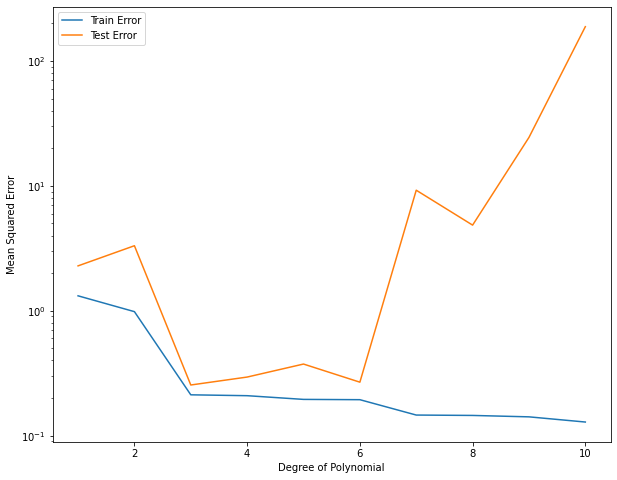

In [ ]:
#Test Error vs. Degree, Train Error vs. Degree
train_errors, true_errors = [], []

for degree in range(1, 11):
    X_test = get_features(degree, x_test)
    X_train = get_features(degree, x_train)
    w = ols(X_train, y_train)
    y_pred = X_test@w
    y_pred_data = X_train@w

    train_errors.append(mse(y_pred_data, y_train))
    true_errors.append(mse(y_pred, y_test))

plt.figure(figsize=(10, 8))
plt.yscale("log")
plt.plot(range(1, 11), train_errors, label = "Train Error")
plt.plot(range(1, 11), true_errors, label = "Test Error")
plt.legend()
plt.ylabel("Mean Squared Error")
plt.xlabel("Degree of Polynomial")

**1.4.2. From the plot above, what do you notice about the training and test errors as the degree increases? Does this align with the learned function you saw in the previous cell?**

  YOU ANSWER HERE: As the degree increases, the training error goes down overall. For degree greater than 6, we can see that the test error actually starts to increase. This makes sense given the previous cell as we saw that the learned function for degree > 6 was quite bad for values of x greater than 0.5

In most real world situations, we won't know details about the true underlying function. In this case, that could mean we don't know what the degree of the true polynomial function is. Let's guess that it is a degree 7 polynomial and see what happens with running Polynomial Regression with OLS.

**1.4.3. Implement the code below and graph the resulting function from running Polynomial Regression with OLS with a 7 degree polynomial:**

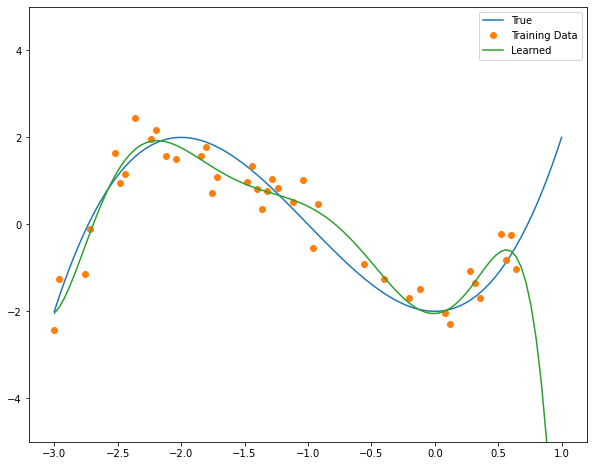

Weight Vector [-2.05067663  0.11158767  7.23500763  2.36814024 -7.72278608 -7.84260951
 -2.73664038 -0.32646127]
Norm of Weight Vector: 13.81719494826317


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(x_range, func(x_range), label='True')
plt.plot(x_train, y_train, 'o', label='Training Data')

D = 7

X_range = get_features(D, x_range)
### BEGIN CODE ###
X_train = get_features(D, x_train)
w = ols(X_train, y_train)
### END CODE ###
y_pred = X_range@w

plt.plot(x_range, y_pred, label='Learned')
plt.ylim(-5, 5)
plt.legend()
plt.show()
print("Weight Vector", w)
print("Norm of Weight Vector:", np.linalg.norm(w))

Notice that degree 7 polynomial regression with OLS doesn't perform very well given these training points. In the next section, we will introduce a slight variation of OLS called Ridge Regression that can help us fix this problem.

# 2 Ridge Regression

## 2.1 Closed Form Solution

We've seen how when our data is noisy, making our model more complex can actually make our predictions worse. So how can we account for this when we don't know the true model? One strategy is to control the complexity of the model by adding a penalty for weight vectors with higher magnitudes. Let us add a term to the OLS optimization problem that will penalize the weights if they get too large.

Optimization Problem: $\underset{\lambda}{\text{min }} \|y - Xw \|_2^2 + \lambda \|w\|_2^2$

Closed Form Solution: $\hat{w} = (X^TX + \lambda I)^{-1}X^T\vec{y}$

We refer to this method as **Ridge Regression**. 

**2.1.1. One way we can derive the closed form solution for Ridge Regression is by setting the derivative of the optimization problem to 0 and solving for $w$. Given that the derivative of $\underset{\lambda}{\text{min }} \|y - Xw \|_2^2 + \lambda \|w\|_2^2$ with respect to $w$ is:**

  $-2X^Ty+2X^TXw+2\lambda w$

  **Show the derivation for the closed form solution above.**

  YOUR ANSWER HERE: 

  $0=-2X^Ty+2X^TXw+2\lambda w$

  $X^Ty=X^TXw+\lambda w$

  $X^Ty=(X^TX+\lambda I)w$
  
  $(X^TX+\lambda I)^{-1}X^Ty=w$




Now let us try to fit the same training data as before with a degree 7 polynomial, except this time we will use Ridge Regression instead of OLS.

**2.1.2. Fill in the code below to implement ridge regression and run the cell to see the learned function using ridge regression.**

In [ ]:
def ridge(X, y, lambd=1):
    ### BEGIN CODE ###
    return np.linalg.inv(X.T@X + lambd*np.eye(X.shape[1]))@X.T@y
    ### END CODE ###


def plot_ridge(LAMBDA, D):
    plt.figure(figsize=(10, 8))
    plt.plot(x_range, func(x_range), label='True')
    plt.plot(x_train, y_train, 'o', label='Data')

    X_range = get_features(D, x_range)
    X_train = get_features(D, x_train)
    X_test = get_features(D, x_test)

    ### BEGIN CODE ###
    w_ridge = ridge(X_train, y_train, LAMBDA)
    ### END CODE ###

    y_pred_ridge = X_range@w_ridge
    y_pred = X_train@w_ridge
    y_pred_test = X_test@w_ridge
    plt.plot(x_range, y_pred_ridge, label=f'lam:{LAMBDA}')
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()
    print("Weight Vector", w_ridge)
    print("Magnitude of Weight Vector:", np.linalg.norm(w_ridge))
    print("Train Error:", mse(y_pred, y_train))
    print("Test Error:", mse(y_pred_test, y_test))

ridge_slider = widgets.FloatLogSlider(value = 0.1, base = 10, min = -3, max = 3, step = 0.5, description = "lambda")
interactive(plot_ridge, LAMBDA = ridge_slider, D = fixed(7))

interactive(children=(FloatLogSlider(value=0.1, description='lambda', max=3.0, min=-3.0, step=0.5), Output()),…

**2.1.3 As we increase $\lambda$, the shape of our function changes. How do the following depend on $\lambda$?**
  *   Complexity (aka magnitude of the weight vector)
  *   Train Error
  *   Test Error

YOUR ANSWER HERE: As $\lambda$ increases: the complexity decreases, the train error decreases, and the test error decreases till around $\lambda=1$ before increasing again.

**2.1.4 Which one do we think is most important to optimize? What $\lambda$ should we choose?**

  YOUR ANSWER HERE: Test error is the most important to optimize because it tells us how well our model can perform on data it hasn't seen before. 

**2.1.5 What would happen if $\lambda$ goes to 0? (hint: consider the OLS closed form solution)**

YOUR ANSWER HERE: We would get the same solution as ols. We can prove this by taking the closed form solution for Ridge Regression and setting $\lambda$ to 0.

**2.1.6. What happens to $w$ if $\lambda$ goes to infinity?**

YOUR ANSWER HERE: As $\lambda$ goes to infinity, $w$ goes to 0.



## 2.2 Choosing Lambda

In Ridge Regression, $\lambda$ is inherent to our model, and thus, must be picked by the person creating the model. We refer to this as a **hyperparameter**. What $\lambda$ works best depends on the data itself. The higher $\lambda$ is, the more it penalizes complexity, and thus regularizes the output.

In this case, we'll show which $\lambda$ works best by testing against our true function. However, in the real world, where we don't know the true model, it's best to choose hyperparameters through cross-validation.

**2.2.1. Run the cell next cell and report the best $\lambda$.**

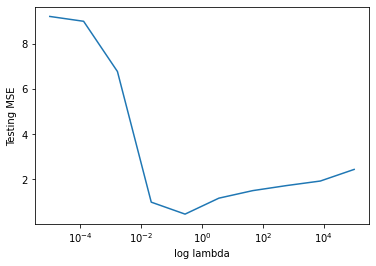

Best Loss: 0.4460214755433866, Best Lambda: 0.2782559402207126


In [ ]:
mses = []
lambdas_mse = np.logspace(-5, 5, 10)

best_loss = float('inf')
best_lambd_mse = None
X_test = get_features(7, x_test)
X_train = get_features(7, x_train)

for lambd in lambdas_mse:
    w = ridge(X_train, y_train, lambd)
    y_pred_test = X_test@w
    loss = mse(y_pred_test, y_test)
    mses.append(loss)
    if best_loss > loss:
        best_loss = loss
        best_lambd_mse = lambd

plt.plot(lambdas_mse, mses)
plt.xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Testing MSE')
plt.show()

print(f'Best Loss: {best_loss}, Best Lambda: {best_lambd_mse}')

# 3 Bias Variance Trade Off





In order to further understand why we must tune $\lambda$, let's look at a very important concept in machine learning: Bias-Variance Trade Off. Please note that the mathematical expressions in this toy example have been simplified to help with understanding and convey the big ideas.  In order to understand this concept, let's start by observing two probability based expressions: $E[|\hat{w}- w|_2]$ and $Var[|\hat{w}|_2]$.

1.   $E[|\hat{w}- w|_2]$: This term is the *'bias'* of our model. At a high-level, this term represents the expected distance between our predicted model weights and the true model weights. $|\cdot|_2$ refers to the *euclidean norm*. $\hat{w}$ is the predicted weights from ridge regression. $w$ is the true underlying model's weights. Since we are dealing with vectors, $|\hat{w}- w|_2$ is essentially a 'distance' measure for how far $\hat{w}$ is from $w$. The $E[\cdot]$, here, refers to *expectation* of the enclosed quantity. However, the concept of expectation does not need to be understood for this example case. We will instead use *mean* as a proxy for expectation. (Note: The *real* bias term represents how far the predicted $y$ is from the real $y$. However, the math required in analyzing this would be a little more sticky and therefore *our toy* bias term compares the predicted weight with the real weight.)

2.   $Var[|\hat{w}|_2]$: This term is the *'variance'* of our model. This term can be likened to the spread of the predicted model weight. The $Var[\cdot]$ refers to the variance of the enclosed quantity. Like expectation, the concept of variance is not needed in this example. Instead, we will use the square of the *standard deviation*. (Note: The *real* variance term measures the spread of the predicted $y$. However, our toy variance term just measures the spread of the predicted weights.)

Why are these bias and variance expressions important? Intuitively we want both terms to be as close to 0 as possible (both terms are bounded by 0). Let's think about bias first. The closer bias is to zero, the closer our predicted $\hat{w}$ is to the true model $w$. Next, lets think about variance. A higher  variance implies a greater spread in possible predicted model weights. A greater spread means that the possible predicted model weights will be all over the place yeilding less realiable results. Thus we want the variance to also be close to zero. 

Now, we understand that we must tune $\lambda$ in a way that minimizes both $E[|\hat{w}- w|_2]$ and $Var[|\hat{w}|_2]$. However, how do we calculate these two quantities? First we fix $\lambda$ and then repeatedly draw a dataset $(X_i, \vec{y}_i)$ and compute the associated $\hat{w}_i$, $r$ times.


$$\hat{w}_i = (X_i^TX_i + \lambda I)^{-1}X_i^T\vec{y}_i\\ 
(X_i, \vec{y}_i), \quad 1 \leq i \leq r
$$

Then compute the mean and standard deviation associated to the fixed $\lambda$:
$$ E[|\hat{w}(\lambda)- w|_2] \approx \text{mean}(|\hat{w}_i- w|_2) = \frac{1}{r} \sum_{i = 1}^r |\hat{w}_i- w|_2\\
Var[|\hat{w}(\lambda)|_2] \approx [\text{standard deviation}(|\hat{w}_i|_2)]^2 = \frac{1}{r} \sum_{i = 1}^r \lvert |\hat{w}_i|_2 - \mu \rvert^2, \quad
\mu = \frac{1}{r} \sum_{i = 1}^r |\hat{w}_i|_2
$$

This procedure is repeated over a range of $\lambda$'s. Note that $w$ is a known value in our experiment because we know what the true model is. However, this is often not the real case in real world machine learning.

Now, lets observe how $E[|\hat{w}(\lambda)- w|_2]$ and $Var[|\hat{w}(\lambda)|_2]$ vary with $\lambda$. 

**2.1 Fill in the following code to compute the bias and variance for each $\lambda$**

In [ ]:
def get_train_and_test_data(x_range, degree, function, train_test_split):
    X, Y = generate_data(x_range, function, 1, 80)

    indicies = np.arange(len(X))
    np.random.shuffle(indicies)
    split_index = int(train_test_split * len(X))
    train_indicies = indicies[:split_index]
    test_indicies = indicies[split_index:]


    X_train = get_features(degree, X[train_indicies])
    Y_train = Y[train_indicies]

    X_test = get_features(degree, X[test_indicies])
    Y_test = Y[test_indicies]

    return X_train, Y_train, X_test, Y_test

lambdas_bv = np.logspace(-5, 5, 50)

function = lambda x: x**3 + 3*x**2 - 2
w_true = np.array([-2, 0, 3, 1, 0, 0, 0, 0])
repeat = 600
biases = []
variances = []
X = np.linspace(-3, 1, 101, endpoint=True)
np.random.seed(46545645)

for lam in tqdm(lambdas_bv):
    w_hats_norm = []
    distance = []
    for _ in range(repeat):
        X_train, Y_train, _, _ = get_train_and_test_data(X, 7, function, 0.8)

        # TODO: Compute w_hat and then append appropriate values w_hats_norm and distance
        ### BEGIN CODE ###
        w_hat = ridge(X_train, Y_train, lam)
        w_hats_norm.append(np.linalg.norm(w_hat))
        distance.append(np.linalg.norm(w_hat - w_true))
        ### END CODE ###

    # TODO: Take the mean and standard devaiation squared of the distance and w_hats_norm array, respectively
    ### BEGIN CODE ###
    variances.append(np.var(w_hats_norm))
    biases.append(np.mean(distance))
    ### END CODE ###

biases =  np.array(biases)
variances = np.array(variances)

100%|██████████| 50/50 [00:58<00:00,  1.16s/it]


**2.2 Plot bias and variance as lambda varies.**

Make sure to use a log scale for the lambda axis.

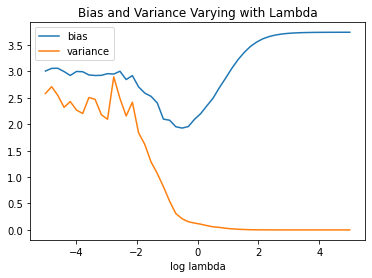

In [ ]:
### BEGIN CODE ###
plt.plot(np.log10(lambdas_bv), biases, label='bias')
plt.plot(np.log10(lambdas_bv), variances, label='variance')

plt.xlabel("log lambda")
plt.title("Bias and Variance Varying with Lambda")

plt.legend()
plt.show()
### END CODE ###

**2.3. How does *bias* change as $\lambda$ increases? Why does this make intuitive sense (Hint: think about how a larger $\lambda$ will force the magnitude of $\hat{w}$ to be smaller)?** 

As lambda increases, bias increases. This is because a larger $\lambda$ implies that the magnitude of $\hat{w}$ will decrease. The lambda is forcing $\hat{w}$ to act in a certain way. This means that $\hat{w}$ will deviate more from the true model $w$ because $\hat{w}$ has an implicit bias to have smaller magnitudes when this is not necessarily the case for $w$.

**2.4. How does *variance* change as lambda increases? Why does this make intuitive sense(Hint: similar to the previous question, think about how a larger $\lambda$ will force the magnitude of $\hat{w}$ to be smaller)**

As lambda increases, variance decreases. A larger magnitude $\lambda$ will force the magnitude of $\hat{w}$ to be closer to 0. Thus at a larger $\lambda$ there will be less spread in the predicted $\hat{w}$ because they will all be closer to the zero vector.

**2.5. What is the significance of the word *trade off* in bias variance trade off? (Hint: think about how variance and bias vary as lambda increases)**

The goal is to bring variance and bias as close to zero as possible. However, as lambda increases variance decreases (which is good) but bias increases (which is bad). Thus we see that in order to decrease one value (ie. variance) the other value (ie. bias) inevitably increases. Therefore, it is a trade off in which we are trying to minimize both values with the optimal lambda.

As stated above, we want both bias and variance to be close to zero. Therefore our objective is to minimize the combination of bias and variance. The exact objective function we want to minimize is $E[|\hat{w}- w|_2]^2 + Var[|\hat{w}|_2]$. The reason why the bias term is squared is beyond the scope of this notebook. The fancy way to write this notion in math is shown below:

$$\underset{\lambda}{\text{min }} E[|\hat{w}- w|_2]^2 + Var[|\hat{w}|_2]\\
\underset{\lambda}{\text{min }} \text{bias}^2 + \text{variance}
$$

Notice here that the *optimization variable* (the variable which we vary to try to reduce the objective function) is $\lambda$. This is because the only parameter that we can change in ridge regression is the $\lambda$ (aside from how we featurize the data).


**2.6. Plot how $\text{bias}^2 + \text{variance}$ varies with $\lambda$. Also plot MSE vs $\lambda$ graph from the previous section.**

The code will also compute the optimal $\lambda$ based on where the lowest $\text{bias}^2 + \text{variance}$ is achieved. 

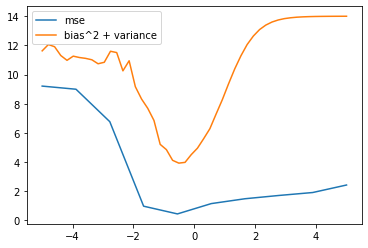

Best Lambda (according to bias^2 + variance): 0.30888435964774846 
Best Lambda (according to MSE): 0.2782559402207126 


In [ ]:
### BEGIN CODE ###
bias_squared_plus_variance = biases ** 2 + variances

plt.plot(np.log10(lambdas_mse), mses, label='mse')
plt.plot(np.log10(lambdas_bv), bias_squared_plus_variance, label='bias^2 + variance')

plt.legend()
plt.show()
### END CODE ###

ymin = np.min(bias_squared_plus_variance)
xpos = list(bias_squared_plus_variance).index(ymin)
best_lambd_bv = lambdas_bv[xpos]

print(f'Best Lambda (according to bias^2 + variance): {best_lambd_bv} ')
print(f'Best Lambda (according to MSE): {best_lambd_mse} ')

**2.7. How does the best lambda according to the $\text{bias}^2 + \text{variance}$ compare to the best lambda according to the MSE? (Hint: think about where the 'dip' occurs in both plots)**

Both plots show that the optimal lambda is around 0.3. This is a crucial concept in bias-variance trade off. The best lambda occurs where both the test error and the bias-variance error are minimized.

**2.8. Why is a high bias considered underfitting? (hint: In general machine learning, high bias implies that the model is likely to miss important patterns. Think about how this relates to the large $\lambda$ causing a high bias in our case.)**

The large $\lambda$ causes  $|\hat{w}|_2$ to be closer to zero. As a result, the large $\lambda$ is forcing the weights in $\hat{w}$ to be close to zero when it reality the weights may be larger. Thus, the model is underfitting the data by not achieving the function we had hoped to predict.

**2.9. Why is high variance considered overfitting? (hint: High variance generally  that the model is too sensitive to small changes in the training data. Think about how this relates to the case when $\lambda$ goes close to zero and the ridge regression essentially becomes OLS.)**

When $\lambda$ is close to zero we are essentially running OLS. In the 'Overfitting of Noise using OLS' section of the notebook it was shown that OLS can overfit to the data. In this case, OLS is too susceptible to the small changes in noise and thus there is a greater spread in the possible predicted weights, $\hat{w}$. This is overfitting because the model fits the training data 'too well' but will not do well on future, unseen data.

# 4 Eigenvalue Perspective of Ridge Regression

**Please note that this section will be more math heavy and serves more as a supplemental section for those who want to further deepen their understanding of ridge regression and its relation to OLS.**

### 4.1 Diving a Little Deeper

Let's reiterate how OLS is solved again:

Optimization Problem: 

$$\underset{w}{\min} \|y - Xw \|_2^2$$

Closed Form Solution:

$$\hat{w} = (X^TX)^{-1}X^T\vec{y}$$

Let's dig a little deeper into the matrix $X^TX$ from the closed-form solution, but first let's build some intuition.

---

**4.1.1.** Suppose each data point in $X$ was 1 dimensional.

The matrix multiplication $X^T X$ would be $1 \times n$ by $n \times 1$, which outputs a $1 \times 1$ matrix, making $X^T X$ a scalar in this case.

**What values of $X^T X$ may "mess up" the calculation of $\hat{w}$ in the closed-form solution? *(Hint: What happens if $X^TX$ is 0 or close to 0)***

**SOLUTION:** If $X^TX$ is 0 or very close to 0, then $(X^TX)^{-1}$, or $\frac{1}{X^TX}$, would end up exploding, since $\frac{1}{x}$ would approach infinity as $x$ approaches 0.

---

Let's expand this issue a more general case, when $X^TX$ is a matrix. But before that let's do a quick review on eigenvalues and eigenvectors.

In EECS 16A, you learned about eigenvalues and eigenvectors of a matrix, where the $i$th eigenvalue-eigenvector pair $(\lambda_i, \vec{v}_i)$ of some matrix $A$ exhibits the following behavior:

$$A\vec{v}_i = \lambda_i \vec{v}_i$$

You also learned about diagonalization, where if a $n \times n$ matrix has $n$ linearly independent eigenvectors, then you can express some matrix $A$ as:

$$A = V \Lambda V^{-1}$$

Where $V = \begin{bmatrix} \vec{v}_1 & \cdots & \vec{v}_n \end{bmatrix}$ is the matrix where each column is an eigenvector of the matrix, and $\Lambda$ is a diagonal matrix containing the eigenvalues, i.e.:

$$\Lambda = \begin{bmatrix} 
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_n
\end{bmatrix}$$



Now that we have done a quick review of eigenvalues and eigenvectors, we are now ready to analyze $X^T X$.

Fortunately, $X^TX$ (and any matrix that of similar form) falls into a category of special matrices known as positive-semidefinite matrices, and has two properties that we will utilize:

* $X^TX$ is symmetric (verify with yourself why this is true), and thus is diagonalizable.
* Being positive semidefinite, $X^TX$ has eigenvalues that positive or zero, that is $\lambda_i \geq 0, \forall i$.

As mentioned above $X^T X$ is symmetric and thus diagonalizable, which is great news! We can diagonalize $X^T X$ in the following manner.

$$X^T X = V \Lambda V^{-1}$$

With this decomposition, we can now analyze the eigenvalues of $X^T X$ as they are located in $\Lambda$, and this will help us reveal more about the behavior of OLS.

Now we are ready to examine $(X^T X)^{-1}$.

Based on the scalar case, we know that taking the inverse, aka taking the reciprocal can lead to some issues, so let's see if something similar shows up. Using the diagonalization of $X^T X$, we can construct an inverse in terms of $V$ and $\Lambda$.

We know that $V$ is comprised of linearly independent eigenvectors, as this is a requirement for diagonalization, which implies that $V$ is invertible. Thus, we can left multiply $X^T X$ by $V^{-1}$ to get the following result:

$$V^{-1} (X^T X) = V^{-1} (V \Lambda V^{-1}) = \Lambda V^{-1}$$

Since $\Lambda$ is a diagonal matrix, its inverse is a diagonal matrix where each non-zero entry is the reciprocal of the corresponding entry in the original matrix. In the case of $\Lambda$, we have:

$$
\Lambda^{-1} = \begin{bmatrix} 
\frac{1}{\lambda_1} & 0 & \cdots & 0 \\
0 & \frac{1}{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \frac{1}{\lambda_n}
\end{bmatrix}
$$

We can then left multiply what we currently have by $\Lambda^{-1}$:

$$\Lambda^{-1} (V^{-1} X^T X) = \Lambda^{-1} (\Lambda V^{-1}) = V^{-1}$$

Finally, we can left multiply by $V$ again to obtain the identity matrix:

$$V(\Lambda^{-1} V^{-1} X^T X) = V(V^{-1}) = I$$

Thus we can conclude that

$$(X^T X)^{-1} = V^{-1} \Lambda^{-1} V$$

---

**4.1.2. Now that we know some more details about the inverse of $X^TX$, what problems may arise when calculating this matrix? *(Hint: Taking the reciprocal of a scalar $X^TX$ was a "weak point" in the process, is there something similar in the matrix case? What does being positive semi-definite mean for the eigenvalues of $X^TX$?)***

**SOLUTION:** Examining $\Lambda^{-1}$, we see that we are taking the reciprocals of the eigenvalues. However, since $X^TX$ is positive semi-definite, this means that it is possible for the eigenvalues of $X^T X$ to be 0 or near 0, which would cause these reciprocals to explode. If at least one of the eigenvalues were close to 0, it could cause $\hat{w}$ to explode as well. Furthermore, it would cause stability issues during the calculation.

---

Now that you have a better understanding of what is going on mathematically behind the scenes, let's examine the behavior of the data matrix in action!

## 4.2 Visualizing Eigenvalues

Let's visualize the eigenvalues of $X^T X$

For visualization purposes, we will resample $x$ values in the interval $[-1, 1]$. We then will featurize $x$ into $X$ with polynomial features at varying degrees.

**4.2.1. Implement the code to find the eigenvalues of a matrix. *(Hint: What numpy function can do this for us?)***

In [ ]:
def eigenvalues(X):
    ### BEGIN CODE ###
    eigenvals = np.linalg.eig(X)[0]
    ### END CODE ###
    
    return eigenvals

**4.2.2 Run the following cell to see the eigenvalues of $X^T X$ at varying polynomial degrees. Pay attention to the scaling of the y-axis.**

In [ ]:
np.random.seed(0)
x_new = np.random.uniform(-1, 1, 50)

def plot_OLS_eigenvalues(x, degree):
    X = get_features(degree, x)
    eigs = eigenvalues(X.T @ X)
    plt.plot(np.arange(1, len(eigs) + 1), eigs, 'o', label="Eigenvalues")
    plt.yscale('log')
    plt.xlim((0, 76))
    plt.ylim((1e-20, 1e4))
    plt.legend()

deg_slider = widgets.IntSlider(value=1,
                               min=1,
                               max=75,
                               step=1,
                               description="Degree")

interactive(plot_OLS_eigenvalues, x=fixed(x_new), degree=deg_slider)

interactive(children=(IntSlider(value=1, description='Degree', max=75, min=1), Output()), _dom_classes=('widge…

---

**4.2.3. Comment on what you observe. Does what you see match the cause for issues that may arise from taking the inverse of $X^T X$ in OLS?**

**SOLUTION:** We see that the eigenvalues sharply drop towards very small values and at a certain point, they flatten out at around $10^{-15}$. If we were to examine the inverse in terms of $V$ and $\Lambda$, we'll see that $\Lambda^{-1}$ will explode at these small eigenvalues, i.e. $\frac{1}{10^{-15}} = 10^{15}$, which is a huge value. 

Aside: The eigenvalue calculation also runs into numerical instability, where it ends up returning complex values, but that actually contradicts the definition of a positive semidefinite matrix, since for a real matrix $A$, the eigenvalues are positive or zero and real.

---

Now let's examine the solution to ridge regression:

Optimization Problem: 

$$\underset{w, \lambda}{\min} \|y - Xw \|_2^2 + \lambda \|w\|_2^2$$

Closed Form Solution: 

$$\hat{w} = (X^TX + \lambda I)^{-1}X^T\vec{y}$$

Let's visualize the eigenvalues of $X^T X + \lambda I$.

**4.2.4 Run the cell below, where the features of $X$ is fixed to be at dimension 60, and we vary $\lambda$.**

In [ ]:
X_new = get_features(60, x_new)
eigs_ols = eigenvalues(X_new.T @ X_new)

def plot_ridge_eigenvalues(X, lambd):
    eigs_ridge = eigenvalues(X.T @ X + lambd * np.eye(X.shape[1]))

    plt.plot(np.arange(1, len(eigs_ols) + 1), eigs_ols, 'o', label="OLS")
    plt.plot(np.arange(1, len(eigs_ridge) + 1), eigs_ridge, 'o', label="Ridge")
    plt.yscale('log')
    plt.ylim((1e-20, 1e4))
    plt.legend()

lambd_slider = widgets.FloatLogSlider(value=1e-10,
                                      min=-20, 
                                      max=1, 
                                      step=1, 
                                      description="lambda")

interactive(plot_ridge_eigenvalues, X=fixed(X_new), lambd=lambd_slider)

interactive(children=(FloatLogSlider(value=1e-10, description='lambda', max=1.0, min=-20.0, step=1.0), Output(…

---

**4.2.5 Comment on what you observe as you change $\lambda$. How do you think the calculation will differ between Ridge Regression and OLS?**

**SOLUTION:** We see that increasing $\lambda$ increases the lower bound on the eigenvalue of $X^TX + \lambda I$. This will help stablize the calculation of the inverse in Ridge Regression.

---

We can now see ridge regression in another perspective: it serves as a way to make OLS a more robust process by controlling the eigenvalues of the $X^T X$ matrix with a lower bound, stabilizing the calculation of the weight vector.

### 4.3 Ridge Regression as a High-Pass Filter

In EECS 16B, you have learned about RLC circuits and the phasor space, which was used to help analyze circuits that receive sinusoidal voltages as an input.

(Based on Fall 2020, freq response occurs in week 5, but students already know about the phasor space, in this case it would be better to walk through a high pass filter and introduce the $H$ function).

We will walk through a specific type of RLC circuit called a high-pass filter and see how the behavior of this circuit relates to the eigenvalues in Ridge Regression.

(In the case where frequency responses and bode plots have already been introduced)

In particular, you learned about how you can create filters for certain frequencies, where a high-pass filter lets high frequences through, a low pass filter lets low frequencies through, and a band-pass only allows a range of frequencies to pass through.

Let's reanalyze the high-pass and low-pass filters and generate plots for their frequency responses.

Take a look at the following circuit below:

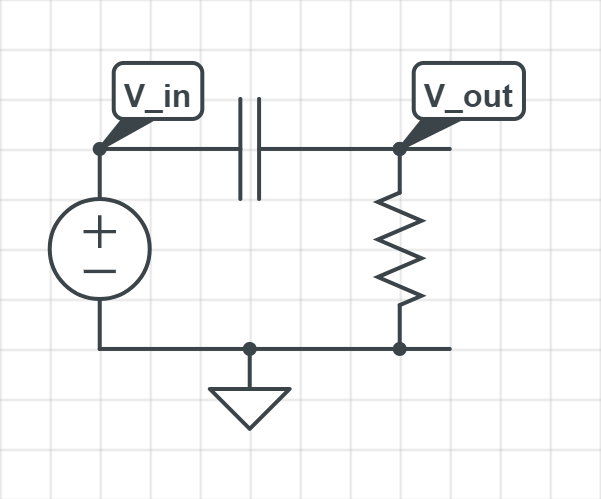

---

**4.3.1.** Suppose we had a sinusoidal input voltage at some frequency $\omega$, (i.e. $v_{in}(t) = \operatorname{Re} \left[V_{in} e^{j\omega t}\right]$), and a sinusoidal output voltage $v_{out}(t) = \operatorname{Re} \left[V_{out} e^{j\omega t}\right]$. The capacitor has a capacitance of $C$ and the resistor has a resistance of $R$.

**Convert the above circuit to the phasor domain. If $v_{in}$ and $v_{out}$ are the voltages in the domain of real numbers, what is their phasor representation *(Don't overthink this!)* What are the impedances of the capacitor and the resistor?**

**Solution:** The phasor counterparts of $v_{in}$ and $v_{out}$ are $V_{in}$ and $V_{out}$, repsectively. The impedance of the capacitor is $Z_C = \frac{1}{j\omega C}$ and the impedance of the resistor is $Z_R = R$.

---

**4.3.2.** Now that we have converted the components of the circuit into the phasor domain, we will now derive an important characteristic function called the *transfer function*:

$$H(\omega) = \frac{V_{out}}{V_{in}}$$

**Quickly explain what the transfer function represents. Derive the transfer function for this particular circuit, which will be of the form $\frac{1}{1 + h(\omega)}$, where $h(\omega)$ will be some function of $\omega$. *(Hint: Start with the impedances $Z_R$ and $Z_C$ and write out $H$ in terms of them. Then plug in the values for $Z_R$ and $Z_C$ you found in the previous problem).***

**SOLUTION:** The transfer function describes the ratio of the output to input voltage in the phasor space.

Since impedances describe a linear relationship between current and voltage in the phasor domain, we can simply treat them as resistors. We then see that this particular circuit is a voltage divider, where

$$V_{out} = \frac{Z_R}{Z_C + Z_R}V_{in}$$

From this we see that $H$ in terms of $Z_R$ and $Z_C$ is

$$H(\omega) = \frac{V_{out}}{V_{in}} = \frac{Z_R}{Z_C + Z_R}$$

Plugging in what we found for $Z_R$ and $Z_C$ in the previous problem:

$$\frac{Z_R}{Z_C + Z_R} = \frac{R}{\frac{1}{j \omega C} + R}$$

Finally, following the hint, we can simplify the transfer function by dividing the numerator and denominator by $R$:

$$\frac{R}{\frac{1}{j \omega C} + R} = \frac{1}{\frac{1}{j \omega RC} + 1}$$

Rearranging the terms in the denominator yields us the desired form:

$$H(\omega) = \frac{1}{1 + \frac{1}{j \omega RC}}$$

---

**4.3.3.** Now let's quickly analyze how the magnitude of the transfer function, and thus the magnitude of the input and output voltages, behave.

**What do you think is the largest magnitude $H(\omega)$ can take? At what value of $\omega$ do you think this will happen? Explain what that means in terms of the input and output voltages. 
What is the smallest magnitude $H(\omega)$ can take, and what value will $\omega$ be at? Explain what that means in terms of the input and output voltages.**

**SOLUTION:** We see that the second denominator term will be imaginary, so it will never cancel out any real component in $H(w)$. Thus, in order to maximize $H(\omega)$, we need the imaginary component to be 0. This will occur when $\omega$ approaches infinity. 

$$H(\infty) = \frac{1}{1 + j\frac{1}{\infty}} = \frac{1}{1 + 0j} = 1 \implies |H(\infty)| = 1$$

In this scenario, a ratio of 1 means that the magnitude of the output signal is the same as the input signal, or in other words the input signal is completely preserved in the output.

In order minimize $H(\omega)$ we want the imaginary component to be as large as possible. This will occur when $\omega = 0$. 

$$H(0) = \frac{1}{1 + j\frac{1}{0}} = \frac{1}{1 + \infty j}$$

$$|H(0)| = \left|\frac{1}{1 + \infty j}\right| = \frac{1}{|1 + \infty j|} = \frac{1}{\sqrt{1^2 + \infty^2}} \approx \frac{1}{\infty} = 0$$

In this scenario, a ratio of 0 means that the magnitude of the output signal is 0, or in other words, none of the input signal was preserved in the output.

---

**4.3.4 Explain why this particular circuit would be called a high-pass filter.**

**SOLUTION:** We see that at high frequencies, the input signal is preserved, while at low frequencies, little to no signal is preserved. Thus we can say this circuit filters out voltages such that it lets *high* frequencies *pass* through.

---

Now that we have an intuition of how the transfer function behaves, let's visualize it. A plot of the maginitude of the transfer function relative to the frequency of the input voltage is known as a *Bode Plot*.

**4.3.5. Run the next three cells below to take a look at the Bode Plot of our circuit. Play around with the slider that changes the value of $\frac{1}{RC}$. Again pay attention to the scale of both x and y axes.**

In [ ]:
def high_pass(omega, RC):
    return 1 / (1 + 1 / (1j * omega * RC))


In [ ]:
omegas = np.logspace(-5, 5, 100)

def plot_high_pass(omegas, RC):
    magnitudes = np.absolute(high_pass(omegas, 1/RC))
    plt.plot(omegas, magnitudes)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim((1e-6, 1e1))
    plt.grid()

high_pass_slider = widgets.FloatLogSlider(value=1,
                                            min=-5,
                                            max=5,
                                            step=0.25,
                                            description="1/RC")

interactive(plot_high_pass, omegas=fixed(omegas), RC=high_pass_slider)

interactive(children=(FloatLogSlider(value=1.0, description='1/RC', max=5.0, min=-5.0, step=0.25), Output()), …

In [ ]:
def plot_high_pass_2(omegas, RC):
    magnitudes = np.absolute(high_pass(omegas, 1/RC))
    plt.plot(omegas, magnitudes)
    plt.xscale('log')
    plt.ylim((-.25, 1.25))
    plt.grid()

high_pass_slider = widgets.FloatLogSlider(value=1,
                                            min=-5,
                                            max=5,
                                            step=0.25,
                                            description="1/RC")

interactive(plot_high_pass_2, omegas=fixed(omegas), RC=high_pass_slider)

interactive(children=(FloatLogSlider(value=1.0, description='1/RC', max=5.0, min=-5.0, step=0.25), Output()), …

---

**4.3.6. In the Bode plot, at what frequencies are the voltages kept and when is it "silenced"? What seems to be the threshold for this behavior?**

**SOLUTION:** We see that at frequencies greater than $\frac{1}{RC}$ the voltage response is left untouched, while at frequencies less than $\frac{1}{RC}$, the voltages are cut off.

---

**4.3.7. Compare this with the plot of eigenvalues. What part of the $H$ function do eigenvalues represent? What part of the $H$ function does $\lambda$ represent? *(Hint: What exactly does the $H$ function calculate? Can you use this information to relate it back to eigenvalues in Ridge?)***

**SOLUTION:** While a bit hard to see at first, if we think about the $H$ function as the ratio $\frac{V_{out}}{V_{in}}$, just like how the $H$ function tells us how much of $V_{in}$ to keep in $V_{out}$ based on $\omega$, Ridge Regression tells us how much of each eigenvalue to keep based on its value.

In our case, the eigenvalues would be represented by $\omega$, and $\lambda$ would be represented by $\frac{1}{RC}$. If the eigenvalue is larger than $\lambda$, then we see that its value is maintained. However, if it is less than $\lambda$, then we see that the eigenvalue gets "silenced".

---

Now you can see another perspective of Ridge Regression: as a high pass filter on eigenvalues! We hope you have a better intuition on how the eigenvalue plots work in relation to $\lambda$, and how it can help improve the regression performance compared to OLS.

# 5 Alternative Solution to Ridge and Fake Data/Features perspectives

## 5.1 Alternative Solution to Ridge Regression

An important detail to note in OLS is that the closed-form solution $w = (X^TX)^{-1} X^Ty$ is designed for a regression problem where the data matrix is *tall*, or has more data points than features ($n > d$).

---

**5.1.1. Sanity Check:** Suppose that the features of a tall data matrix $X$ were linearly independent. **Comment on the existence of a solution. How does that tie into OLS?**

**SOLUTION:** Since there are more data points than features, in linear algebra terms there are more equations than variables. This would imply that a solution may not exist. In the equation $Xw = y$, OLS finds the solution in the column space of $X$ that is closest to $y$.

---

**5.1.2** Now suppose that $X$ is a square matrix and has linearly independent columns. **Comment on the existence of a solution. How would you find the solution?**

**SOLUTION:** Since $X$ is square and linearly independent, we can simply use the inverse to find $w$:

$$w = X^{-1} y$$

The existence of an inverse also implies that the solution is unique.

---

**5.1.3.** Now suppose that $X$ is a wide matrix, where it has more features than data points ($n < d$). **Comment on the existence of a solution. *(Hint: Are the columns of $X$ linearly independent?)***

**SOLUTION:** Since $X$ is a wide matrix, the columns cannot be linearly independent (verify why this is true, what can the maximum rank of $X$ be?). Since the columns are linearly dependent, if a solution exists then there must be infinite solutions, since once you have found a solution, you are able to rearrage some of the weights on each column such that you get an equivalent solution. If the equations are inconsistent, then there are no solutions.

---

Now you know the three scenarios for the shape the data matrix can take on, let's now focus on the wide matrix case more. 

**5.1.4. Since there can be infinite solutions $w$ to the system $Xw = y$ if $X$ is wide, what would be the "best" $w$ in this case. *(Hint: Think about ridge regression, what was it trying to minimize?)***

**SOLUTION:** In ridge regression, we applied a penalty on the norm of the vector $w$. In this case the similar logic applies and the ideal solution $w$ would be the one with minimum norm.

---

Now that we understand what the goal with solving regression problem with wide matrices is, let's formally define the problem and the closed-form solution:

Optimization Problem:

$$\underset{w}{\min} \|w\|^2_2 \text{ s.t. } Xw = y$$

Closed-Form Solution:

$$w = X^T(XX^T)^{-1}y$$

This looks very similar to the OLS solution! It turns out this solution is known as the *minimum-norm solution* and later in EECS 16B you will learn how this solution is derived.

Similarily, if we were to add a ridge pentalty to this minimum-norm solution, then we would arrive at an alternative closed-form solution for Ridge Regression:

$$w = X^T(XX^T + \lambda I)^{-1}y$$

You don't need to fully understand the significance of this alternative solution for ridge regression right now, but it is useful to notice that the matrix multiplication of $XX^T$ consists of only dot products between $\vec{x}_i$ feature vectors. This property connects very well with Kernels, a topic you will learn about in a future lesson.

**5.1.5. Fill in the code below and run the cell to verify that the alternative closed-form solution for ridge regression gives us the same result:**

In [ ]:
# Generating the polynomial toy model data again
x_range = np.linspace(-3, 1, 101, endpoint=True)
func = lambda x: x**3 + 3*x**2 - 2
np.random.seed(123)
x, y = generate_data(x_range, func, 0.4, 80)

N = 40
x_train = x[:N] 
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]
X_train = get_features(D, x_train)

def ridge_alternative(X, y, lambd=0.1):
    ### BEGIN CODE ###
    w = X.T @ np.linalg.inv(X @ X.T + lambd * np.eye(X.shape[0])) @ y
    ### END CODE ###
    return w

lambd = 0.1
w_ridge = ridge(X_train, y_train, lambd)
w_ridge_alternative = ridge_alternative(X_train, y_train, lambd)
print(f'w_ridge: {w_ridge}')
print(f'w_alternative: {w_ridge_alternative}')

w_ridge: [-1.58959136 -0.27968138  2.47927572  1.14850092 -0.24080509 -0.4640939
 -0.18200006 -0.02130331]
w_alternative: [-1.58959136 -0.27968138  2.47927572  1.14850092 -0.24080509 -0.4640939
 -0.18200006 -0.02130331]


## 5.2 Fake Data and Fake Features Perspective

We are going to introduce two final perspectives on Ridge Regression, which are the fake data and fake features perspectives. More specifically, we will see that the fake data perspective will net us the standard closed-form solution for ridge regression while the fake features perspective will net us the alternative solution to ridge regression.

**5.2.1. Fake Data Perspective**

Given that we have a properly constructed $X$ matrix and $\vec{y}$ vector, let us add fake data points to $X$ and $\vec{y}$ such that:

$$\hat{X} = \begin{bmatrix}
X\\
\sqrt{\lambda}I
\end{bmatrix}$$

$$\hat{y}=\begin{bmatrix}
\vec{y}\\
0
\end{bmatrix}$$

Show that the closed-form ols solution using the augmented $\hat{X}$ matrix and $\hat{y}$ vector will net us the closed-form solution for ridge regression:

YOUR ANSWER HERE:
$$\hat{w}=(\hat{X}^T\hat{X})\hat{X}^T\hat{y}$$
$$\hat{w}=(\begin{bmatrix}
X^T  \sqrt{\lambda}I
\end{bmatrix}\begin{bmatrix}
X\\
\sqrt{\lambda}I
\end{bmatrix})^{-1}\begin{bmatrix}
X  \sqrt{\lambda}I
\end{bmatrix}\begin{bmatrix}
\vec{y}\\
0
\end{bmatrix}$$

$$\hat{w}=(X^TX+\lambda I)^{-1}y$$


**5.2.2. Fill in the code below and run the cell to see that the fake data perspective gives us the same result as ridge**

In [ ]:
def ridge_fake_data(X, y, lambd = 0.1):
    ### BEGIN CODE ###
    X_hat = np.vstack((X, np.sqrt(lambd)*np.eye(X.shape[1])))
    y_hat = np.hstack((y, np.zeros((X.shape[1]))))
    ### END CODE ###
    w = ols(X_hat, y_hat)
    return w;

X_train = get_features(D, x_train)
lambd = 0.1
w_ridge = ridge(X_train, y_train, lambd)
w_fake_data = ridge_fake_data(X_train, y_train, lambd)
print(f'w_ridge: {w_ridge}')
print(f'w_fake_data: {w_fake_data}')



w_ridge: [-1.58959136 -0.27968138  2.47927572  1.14850092 -0.24080509 -0.4640939
 -0.18200006 -0.02130331]
w_fake_data: [-1.58959136 -0.27968138  2.47927572  1.14850092 -0.24080509 -0.4640939
 -0.18200006 -0.02130331]


**5.2.3. Fake Features Perspective**
Let's augment the data matrix again, except this time we are adding fake features such that:

$$\hat{X} = \begin{bmatrix}
X \sqrt{\lambda}I
\end{bmatrix}$$

Notice that the $\hat{X}$ matrix is wide now, so we need to use the minimum-norm solution instead of OLS. In addition the weight vector we find using the minimum-norm solution will actually have two components: one for the original features and one for the fake features. We will show this decomposition by defining the weight vector from the minimum-norm solution as $\begin{bmatrix}
\hat{w}\\
\hat{\epsilon}
\end{bmatrix}$. Show that the minimum-norm solution with the augmented $\hat{X}$ matrix will net us the same $\hat{w}$ as the alternative closed-form solution for ridge regression:

YOUR ANSWER HERE: 

$$\begin{bmatrix}
\hat{w}\\
\hat{\epsilon}
\end{bmatrix}=\hat{X}^T(\hat{X}\hat{X}^T)^{-1}\vec{y}$$

$$\begin{bmatrix}
\hat{w}\\
\hat{\epsilon}
\end{bmatrix}=\begin{bmatrix}
X^T \\
\sqrt{\lambda}I
\end{bmatrix}(\begin{bmatrix}
X \sqrt{\lambda}I
\end{bmatrix}\begin{bmatrix}
X^T \\
\sqrt{\lambda}I
\end{bmatrix})^{-1}\vec{y}$$

$$\begin{bmatrix}
\hat{w}\\
\hat{\epsilon}
\end{bmatrix}=\begin{bmatrix}
X^T \\
\sqrt{\lambda} I
\end{bmatrix}(XX^T + \lambda I)^{-1}\vec{y}$$

$$\hat{w}=X^T(XX^T + \lambda I)^{-1}\vec{y}$$

**5.2.4. Fill in the code below and run the cell to see that the fake features perspective gives us the same result as ridge**

In [ ]:
def ridge_fake_features(X, y, lambd = 0.1):
    X_hat = np.hstack((X, np.sqrt(lambd)*np.eye(X.shape[0])))
    ### BEGIN CODE ###
    we = X_hat.T@np.linalg.inv(X_hat@X_hat.T)@y
    w = we[:X.shape[1]]
    ### END CODE ###
    return w;

X_train = get_features(D, x_train)
lambd = 1
w_ridge_alternative = ridge_alternative(X_train, y_train, lambd)
w_fake_data = ridge_fake_features(X_train, y_train, lambd)
print(f'w_ridge_alternative: {w_ridge_alternative}')
print(f'w_fake_data: {w_fake_data}')

w_ridge_alternative: [-1.18373602 -0.19662124  0.91983449 -0.0317246   0.14772396  0.14705711
  0.013015   -0.00160606]
w_fake_data: [-1.18373602 -0.19662124  0.91983449 -0.0317246   0.14772396  0.14705711
  0.013015   -0.00160606]


# 6 Sklearn

Finally, we will run through some exercises to get familiar with Sklearn, a machine learning library in python. In most of the practical settings, we won't need to write our own featurization method or ridge regression method as those are often provided for us in common libraries like Sklearn.



## 6.1 Sklearn on the Polynomial Toy Model dataset
First, let's reimplement ridge regression on our polynomial toy model using the PolynomialFeatures and Ridge classes of Sklearn. We will first use sklearn's PolynomialFeatures class to lift the data into a degree 7 polynomial, then perform ridge regression on the dataset and report the training error and test error. Here's some useful documentation to get you started:

1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


**6.1.1. Implement the code below to generate a plot of the training and testing error over a range of lambdas and report the lambda with the best test error.**

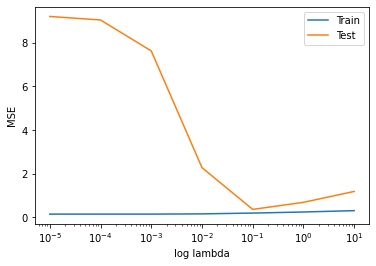

Best Loss: 0.4460214755433866, Best Lambda: 0.1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Regenerating the polynomial toy model data
x_range = np.linspace(-3, 1, 101, endpoint=True)
func = lambda x: x**3 + 3*x**2 - 2
np.random.seed(123)
x, y = generate_data(x_range, func, 0.4, 80)
# Training and validation set split
N = 40
x_train = x[:N]
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

D = 7
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
mses_train = []
mses_test = []
best_mse = float('inf')
best_lambd = None

# TODO: generate the polynomial features for X_train and X_test using PolynomialFeatures
### BEGIN CODE ###
poly = PolynomialFeatures(D)
X_train = poly.fit_transform(np.array(x_train).reshape(len(x_train),1))
X_test = poly.fit_transform(np.array(x_test).reshape(len(x_train),1))
### END CODE ###

for lambd in lambdas:
    # TODO: Train a Ridge model on the polynomial features and evaluate the mse for both training and test sets
    # HINT: the method mse() might be useful here
    ### BEGIN CODE ###
    sklearn_ridge = Ridge(alpha=lambd)
    sklearn_ridge.fit(X_train, y_train)
    y_pred_train = sklearn_ridge.predict(X_train)
    y_pred_test = sklearn_ridge.predict(X_test)
    train_loss = mse(y_pred_train, y_train)
    test_loss = mse(y_pred_test, y_test)
    mses_train.append(train_loss)
    mses_test.append(test_loss)
    if best_mse > test_loss:
        best_mse = test_loss
        best_lambd = lambd
    ### END CODE ###

plt.plot(lambdas, mses_train, label='Train')
plt.plot(lambdas, mses_test, label='Test')
plt.xscale('log')
plt.xlabel('log lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f'Best Loss: {best_loss}, Best Lambda: {best_lambd}')


Compare this error chart with error chart we generated earlier without Sklearn. If you did the coding portion correctly, the results should be similar - which is expected.

## 6.2 Sklearn on a different dataset
Now that you've had an introduction to the Ridge and PolynomialFeature classes of the Sklearn library, let's practice implementing ridge regression using Sklearn on a different dataset.

**6.2.1 Run the cell below to visualize our new dataset:**

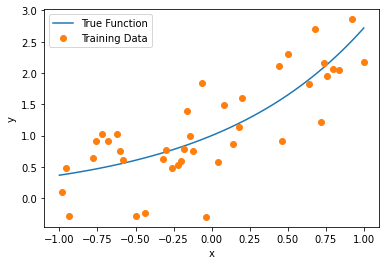

In [ ]:
x_range = np.linspace(-1, 1, 101, endpoint=True)
func = lambda x: np.exp(x)
np.random.seed(12)
x, y = generate_data(x_range, func, .4, 80)

# Training and validation set split, we'll just use 50/50 in this case
N = 40
x_train = x[:N]
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

# Plot the true function and training data
plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Again, let's try to fit this data with a degree 7 polynomial with ridge regression.

**6.2.2. Using the Sklearn library, write code below to visualize the training and testing errors over a range of lambdas and report the best lambda.*(hint: feel free to reference 5.1.1 to get you started)***

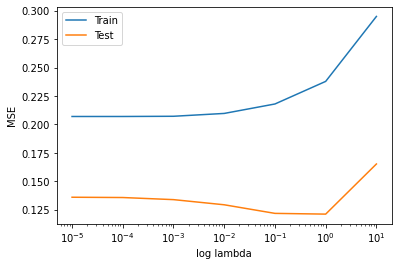

Best Loss: 0.4460214755433866, Best Lambda: 1


In [ ]:
### BEGIN CODE ###

D = 7

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

mses_train = []
mses_test = []
best_mse = float('inf')
best_lambd = None

poly = PolynomialFeatures(D)
X_train = poly.fit_transform(np.array(x_train).reshape(len(x_train),1))
X_test = poly.fit_transform(np.array(x_test).reshape(len(x_test),1))

for lambd in lambdas:
    sklearn_ridge = Ridge(alpha=lambd)
    sklearn_ridge.fit(X_train, y_train)
    y_pred_train = sklearn_ridge.predict(X_train)
    y_pred_test = sklearn_ridge.predict(X_test)
    train_loss = mse(y_pred_train, y_train)
    test_loss = mse(y_pred_test, y_test)
    mses_train.append(train_loss)
    mses_test.append(test_loss)
    if best_mse > test_loss:
        best_mse = test_loss
        best_lambd = lambd

plt.plot(lambdas, mses_train, label='Train')
plt.plot(lambdas, mses_test, label='Test')
plt.xscale('log')
plt.xlabel('log lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f'Best Loss: {best_loss}, Best Lambda: {best_lambd}')
### END CODE ###

**6.2.3. Fill in the best lambda below and run the cell to visualize our learned function. Do you think this was a good choice of lambda? Try other values of lambda as well and report your observations.**

YOUR OBSERVATIONS HERE: From the previous cell, we found the best lambda to be 1. The plot shows that ridge regression is able to learn the true function pretty well with this lambda. If we simply performed OLS by setting lambda to 0, we see that there is some clear overfitting for negative values of x. If we set lambda at 10, then we see that ridge regression has regularized the weights too much and our learned function is not good as well.

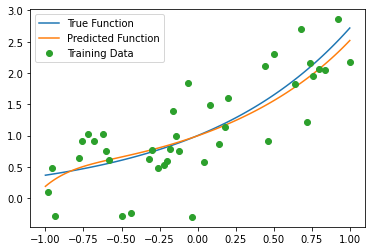

In [ ]:
LAMBD = 1 # Edit this
sklearn_ridge = Ridge(alpha=LAMBD)
sklearn_ridge.fit(X_train, y_train)
X_range = poly.fit_transform(np.array(x_range).reshape(len(x_range),1))
y_range_pred = sklearn_ridge.predict(X_range)
plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_range, y_range_pred, label=f'Predicted Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.legend()
plt.show()

## 6.3 Additional Datasets for Practice

**6.3.1. Here are some more datasets you can use to practice implementing Ridge Regression with the Sklearn library. Feel free to explore other degrees of polynomial features as well.**


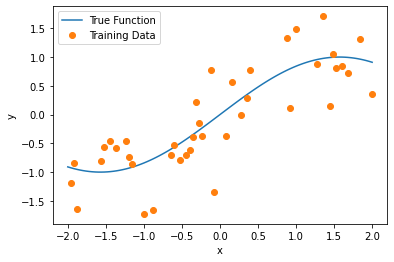

In [ ]:
dataset = 'sine' # Dataset 1: Sine Function
# dataset = 'sqrt' # Dataset 2: Square Root Function
# dataset = 'inverse' # Dataset 3: Inverse Function

if dataset == 'sine':
    x_range = np.linspace(-2, 2, 101, endpoint=True)
    func = lambda x: np.sin(x)
    np.random.seed(12)
    x, y = generate_data(x_range, func, .4, 80)

if dataset == 'sqrt':
    x_range = np.linspace(0, 10, 101, endpoint=True)
    func = lambda x: np.sqrt(x)
    np.random.seed(12)
    x, y = generate_data(x_range, func, .4, 80)

if dataset == 'inverse':
    x_range = np.linspace(.5, 1.5, 101, endpoint=True)
    func = lambda x: 1/x
    np.random.seed(12)
    x, y = generate_data(x_range, func, .2, 80)
    
# Training and validation set split, using 50/50 for now
N = 40
x_train = x[:N]
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

# Plot the true function and training data
plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()